In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ij9mzkep
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ij9mzkep
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=62a013b219af773cc4d303914401d9538d3af12f57ec673fd0830e2cc83a7ad3
  Stored in directory: /tmp/pip-ephem-wheel-cache-q1d72gjv/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [2]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth #-P /content/segment-any-thing/

--2023-04-21 08:48:00--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.141.40, 13.249.141.108, 13.249.141.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.141.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   126MB/s    in 20s     

2023-04-21 08:48:20 (123 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["default"](checkpoint="/content/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [6]:
img=cv2.imread('/content/Stone- (1).jpg')
masks = mask_generator.generate(img)

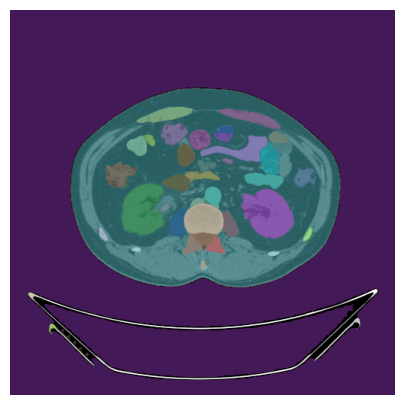

In [10]:
def Show_Masks(masks):
  anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
  ax = plt.gca()
  ax.set_autoscale_on(False)
  polygons = []
  color = []
  for ann in anns:
    m = ann['segmentation']
    image = np.ones((m.shape[0], m.shape[1], 3))
    color_mask = np.random.random((1, 3)).tolist()[0]
    for i in range(3):
        image[:,:,i] = color_mask[i]
    ax.imshow(np.dstack((image, m*0.35)))
plt.figure(figsize=(5,5))
plt.imshow(img)
Show_Masks(masks)
plt.axis('off')
plt.show() 

In [11]:
#[masks[i]['bbox'] for i in range(0,20)]
numb_Masks=0
for key, value in enumerate(masks):
  numb_Masks=numb_Masks+1
print(numb_Masks)

40


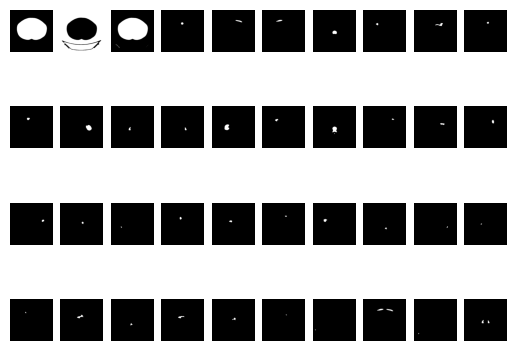

In [12]:
Area_Interest=[masks[i]['segmentation'] for i in range(0,numb_Masks)]
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.axis('off')
  plt.imshow(Area_Interest[i],cmap='gray')
plt.show()